In [18]:
import preprocessing
import utils
import gower
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [19]:
df = preprocessing.load_dataset()
dist_matrix = gower.gower_matrix(df)

In [76]:
## will contain tuples (ncom, explained_variance)
explained_variances = [] 
for n_components in range(0, 20):
    pca = PCA(n_components=n_components)
    pca.fit(dist_matrix)
    explained_variances.append((n_components, (np.sum(pca.explained_variance_ratio_))))

In [77]:
explained_variances

[(0, 0.0),
 (1, 0.5599287),
 (2, 0.83374),
 (3, 0.89656585),
 (4, 0.92637247),
 (5, 0.9482517),
 (6, 0.9648888),
 (7, 0.97510123),
 (8, 0.98111856),
 (9, 0.9849532),
 (10, 0.9878632),
 (11, 0.9901751),
 (12, 0.99186623),
 (13, 0.99336755),
 (14, 0.994584),
 (15, 0.9956451),
 (16, 0.99656594),
 (17, 0.9973883),
 (18, 0.99792093),
 (19, 0.9983645)]

Optimal # of components:  8


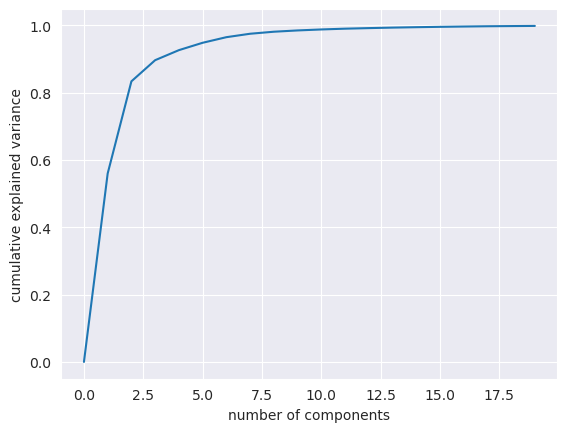

In [78]:
# We take the minimum number of components that explains at least 95% of the variance
threshold_variance = 0.98
optimal_n_components = -1
for i,v in explained_variances:
    if v > threshold_variance:
        optimal_n_components = i
        break
print("Optimal # of components: ", optimal_n_components)

plt.plot([var for _, var in explained_variances] )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


# Design parameters
NCOMP = optimal_n_components

In [79]:
# Apply the algo
pca = PCA(n_components=NCOMP)
pca_result = pca.fit_transform(dist_matrix)
print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(5)))

# Compute the reconstruction error for every data point
alpha = 0.99
# Calcola il valore della chi-quadrato per il dato alpha e gradi di libertà
chi_2 = chi2.ppf(alpha, df=NCOMP)

pcaLabels = np.ones(df.shape[0])
lambdas = np.sqrt(pca.explained_variance_)

PCA: explained variation per principal component: [0.55993 0.27381 0.06283 0.02981 0.02188 0.01664 0.01021 0.00602]


In [82]:
pca_result

array([[ 4.682032  ,  2.426197  , -1.5336889 , ...,  0.69574666,
         0.04449927,  0.35157987],
       [-1.6742766 ,  0.8968721 ,  0.3618258 , ..., -0.18111701,
         0.17092977,  0.04108705],
       [-2.330734  ,  0.72044194,  0.19804049, ..., -0.08103032,
         0.06251735,  0.021354  ],
       ...,
       [ 1.1283628 ,  0.8180057 ,  0.82377213, ...,  0.9051601 ,
        -1.1417361 , -0.29216716],
       [-0.40885454, -2.7981951 , -0.10742346, ..., -0.3027877 ,
         0.13894926, -0.03933478],
       [ 1.0732682 ,  0.85733   ,  0.8138401 , ...,  1.0987594 ,
        -1.2037442 , -0.18131918]], dtype=float32)

In [80]:
## we take the sum of the squared coordinates divided by the eigenvalues
## if its greater than the chi2 value we consider it an outlier
outlier_indices = -(1 * (np.sum((pca_result ** 2) / np.transpose(lambdas), axis=1) > chi_2))

In [81]:
sum(outlier_indices)

-371